<a href="https://colab.research.google.com/github/shailavij/NLP/blob/master/NLP_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
all_posi_tweet= twitter_samples.strings('positive_tweets.json')
all_neg_tweet= twitter_samples.strings('negative_tweets.json')

In [ ]:
# To find datatype of tweets
print('number of positive tweet', type(all_posi_tweet))
print('number of Negative tweet', type(all_neg_tweet[0]))

print('length of positive tweet', len(all_posi_tweet))
print('length of Negative tweet', len(all_neg_tweet))

number of positive tweet <class 'list'>
number of Negative tweet <class 'str'>
length of positive tweet 5000
length of Negative tweet 5000


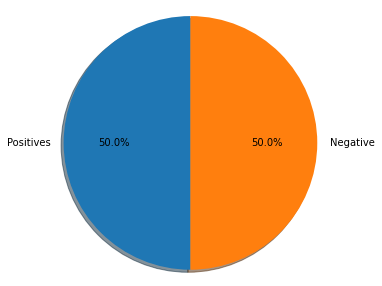

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_posi_tweet), len(all_neg_tweet)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [ ]:
# Print positive tweet in green
print('\033[92m' + all_posi_tweet[random.randint(0,5001)])

# Print positive tweet in red
print('\033[91m' + all_neg_tweet[random.randint(0,5001)])

@ManhattanMango or if they're even familiar with the idea if snapchat. Im sure they have phones but question is are they bothered enough? :p
Hate weekends they just mean work :(


In [ ]:
# Preprocess raw text 

tweet = all_posi_tweet[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string

Lowercasing

Removing stop words and punctuation

Stemming

In [ ]:
# Download stop word
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re                     # Library for regular expression
import string                 # Library for string operation
from nltk.corpus import stopwords    # Module for stop word come with NLTK
from nltk.stem import PorterStemmer   # Module for stemming
from nltk.tokenize import TweetTokenizer # Module for tokenise


In [ ]:
# REmove hyperlinks , twitter marks in tweet
print('\033[92m' + tweet)
print('\033[94m')

# REmove oldstyle retweet text "RT"
tweet2= re.sub(r'^RT[\s]+' ,'',tweet)
#print(tweet2)

# REmove Hyperlink
tweet2 =re.sub(r'https?:/\/.*[\r\n]*','',tweet2)
#print(tweet2)

# REmove hashtag 
tweet2= re.sub(r'#','',tweet2)
print(tweet2)



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


# Tokenise string
Tokenize the string
To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case.

In [ ]:
print()
print('\033[92m' + tweet2)
print('\033[94m')


tok= TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tok= tok.tokenize(tweet2)
print("Tokenise_String : ",tweet_tok)






My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenise_String :  ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [ ]:
# Import English stop word list from NLTK
stopword_english = stopwords.words('english')

print('stopword\n')
print(stopword_english)

print('\nPunctuation\n')
print(string.punctuation)


stopword

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

In [ ]:
print()
print('\033[92m')
print(tweet_tok)
print('\033[94m')
tweet_clean=[]

for word in tweet_tok :
  if( word not in stopword_english and 
     word not in string.punctuation):
    tweet_clean.append(word)

print('remove stop word & punctuation')
print(tweet_clean)





['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

remove stop word & punctuation
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

learn

learning

learned

learnt

All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy

happiness

happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and we will be using the PorterStemmer module which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.

In [ ]:
print()
print('\033[92m')
print(tweet_clean)
print('\033[93m')

# Instantiate stemming class
stemmer = PorterStemmer()

# create Empty list
tweet_stem =[]
for word in tweet_clean :
  stem_word= stemmer.stem(word)
  tweet_stem.append(stem_word)

print("Stem_word")
print(tweet_stem)





['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Stem_word
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
# Dictionary

dict={'key1' : 1, 'key2':2}
dict

{'key1': 1, 'key2': 2}

In [ ]:
dict['key3']= -2
dict['key2']= 5
dict

{'key1': 1, 'key2': 5, 'key3': -2}

In [ ]:
print(dict['key3'])

-2


In [ ]:
# To retrive dictionary value
dict['key4']= 8
dict

{'key1': 1, 'key2': 5, 'key3': -2, 'key4': 8}

In [ ]:
# Using 'get' method we can retrive value
dict.get('key2')

5

In [ ]:
print(dict['key8'])

KeyError: ignored

In [ ]:
print(dict.get('key8',-1))

In [ ]:
if 'key2' in dict:
  print(dict['key2'])
else:
  print('item not found')


In [ ]:
# Word Frequency dictionary

def build_freq(tweet,ys):
  yslist = np.squeeze(ys).tolist()
  freqs={}
  for y, tweet in zip(yslist, tweet):
      for word in process_tweet(tweet):
          pair = (word, y)
          if pair in freqs:
              freqs[pair] += 1
          else:
              freqs[pair] = 1    
  return freqs


In [ ]:
s=build_freq(tweet, labels)
s

{('M', 'Positives'): 1, ('y', 'Negative'): 1}

In [ ]:
s[1:3]

'y '

#Table of word counts

In [ ]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []
freqs={}

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 0, 0],
 ['merri', 0, 0],
 ['nice', 0, 0],
 ['good', 0, 0],
 ['bad', 0, 0],
 ['sad', 0, 0],
 ['mad', 0, 0],
 ['best', 0, 0],
 ['pretti', 0, 0],
 ['❤', 0, 0],
 [':)', 0, 0],
 [':(', 0, 0],
 ['😒', 0, 0],
 ['😬', 0, 0],
 ['😄', 0, 0],
 ['😍', 0, 0],
 ['♛', 0, 0],
 ['song', 0, 0],
 ['idea', 0, 0],
 ['power', 0, 0],
 ['play', 0, 0],
 ['magnific', 0, 0]]